In [2]:
# import splitfolders  # atau import split_folders

# # Men-split kedalam folder train, val, test
# splitfolders.ratio("dataset_1000", output="dataset_1000_baru", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

In [3]:
import os

path = 'dataset_angka/train/'
os.listdir(path)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
for angka in os.listdir(path):
    print('Total ' + str(angka) + ' : ' + str(len(os.listdir(path + str(angka)))))


Total 0 : 3305
Total 1 : 3747
Total 2 : 3341
Total 3 : 3480
Total 4 : 3257
Total 5 : 3036
Total 6 : 3309
Total 7 : 3520
Total 8 : 3250
Total 9 : 3350


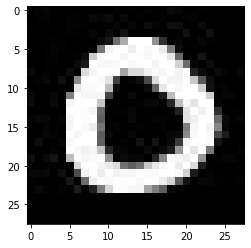

In [41]:
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = tf.keras.utils.load_img(path + '0/img_4.jpg')
imgplot = plt.imshow(img)

In [ ]:
bs = 16

dimensi = (28, 28)
channel = (3, )
inputshape = dimensi + channel


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,
     rotation_range=20,
     zoom_range=0.2,
     shear_range=0.2,
     fill_mode = 'nearest',
     horizontal_flip=True)  # digunakan untuk membalik gambar secara horizontal sebesar 180 derajat


In [7]:
train_generator = datagen.flow_from_directory(
     'dataset_angka/train/',
     target_size=dimensi,
     batch_size=bs,
     class_mode='categorical',
     shuffle = False) # set as training data

validation_generator = datagen.flow_from_directory(
     'dataset_angka/val/', # same directory as training data
     target_size= dimensi,
     batch_size=bs,
     class_mode='categorical',
     shuffle = False)


test_generator = datagen.flow_from_directory('dataset_angka/test/',
                                                  target_size= dimensi,
                                                  batch_size=bs,
                                                  class_mode='categorical',
                                                  shuffle = False)
num_class = test_generator.num_classes
labels = test_generator .class_indices.keys()

Found 33595 images belonging to 10 classes.
Found 4196 images belonging to 10 classes.
Found 4209 images belonging to 10 classes.


In [8]:
print("num_class : ", num_class)
print("labels : ", labels)
print ("---")
print(len(train_generator))
print(len(validation_generator))
print(len(test_generator))
print("Total : " + str(len(train_generator) + len(validation_generator) + len(test_generator)))

num_class :  10
labels :  dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
---
2100
263
264
Total : 2627


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=inputshape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
loss='categorical_crossentropy',
metrics = [tf.keras.metrics.CategoricalAccuracy(name="accuracy", dtype=None), tf.keras.metrics.Precision(name="precision", dtype=None), tf.keras.metrics.Recall(name="recall", dtype=None)])

In [12]:
history = model.fit(train_generator,
               validation_data=validation_generator,
               epochs=20,
               verbose=1)

Epoch 1/20
2100/2100 [==============================] - 59s 28ms/step - loss: 0.8100 - accuracy: 0.7194 - precision: 0.8541 - recall: 0.6325 - val_loss: 0.3773 - val_accuracy: 0.8887 - val_precision: 0.9155 - val_recall: 0.8651
Epoch 2/20
2100/2100 [==============================] - 57s 27ms/step - loss: 0.2857 - accuracy: 0.9092 - precision: 0.9304 - recall: 0.8942 - val_loss: 0.2326 - val_accuracy: 0.9297 - val_precision: 0.9459 - val_recall: 0.9168
Epoch 3/20
2100/2100 [==============================] - 52s 25ms/step - loss: 0.1975 - accuracy: 0.9380 - precision: 0.9495 - recall: 0.9287 - val_loss: 0.1753 - val_accuracy: 0.9466 - val_precision: 0.9555 - val_recall: 0.9371
Epoch 4/20
2100/2100 [==============================] - 52s 25ms/step - loss: 0.1539 - accuracy: 0.9520 - precision: 0.9602 - recall: 0.9447 - val_loss: 0.1329 - val_accuracy: 0.9600 - val_precision: 0.9667 - val_recall: 0.9547
Epoch 5/20
2100/2100 [==============================] - 47s 22ms/step - loss: 0.1363 - a

In [42]:
model.save("CNN Percobaan 2.h5")

In [14]:
# from tensorflow import keras
# history = keras.models.load_model('CNN Percobaan 2.h5')

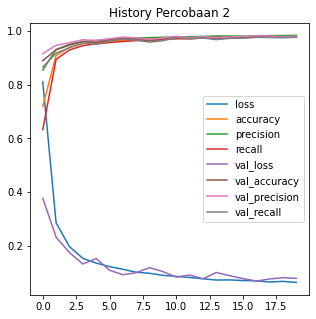

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(5,5))
plt.title('History Percobaan 2')
plt.show()

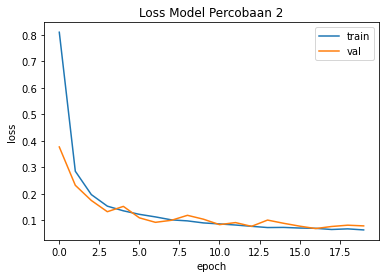

In [39]:
# membuat plot loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Percobaan 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

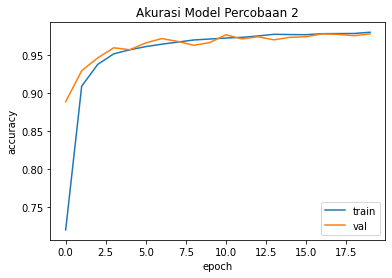

In [40]:
# membuat plot akurasi dari model 


plt.plot(history.history['accuracy'], label='accuracy')             # blue
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Akurasi Model Percobaan 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')     # upper left artinya tulisan pembeda (train test) di kanan bawah
plt.show()



In [21]:
val_loss, val_acc, val_precision, val_recall = model.evaluate(validation_generator, verbose=1)

263/263 [==============================] - 5s 20ms/step - loss: 0.0940 - accuracy: 0.9752 - precision: 0.9777 - recall: 0.9726


In [22]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator, verbose=1)

264/264 [==============================] - 7s 26ms/step - loss: 0.1086 - accuracy: 0.9689 - precision: 0.9720 - recall: 0.9663


C:\Users\laure\AppData\Local\Temp\ipykernel_25312\2022409557.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,  num_of_test_samples // bs+1)


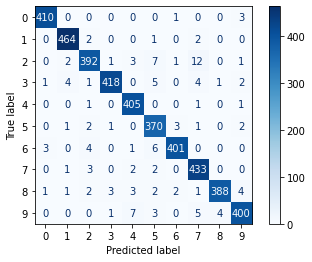

In [43]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

batch_size = bs
num_of_test_samples = len(test_generator.classes)

predictions = model.predict_generator(test_generator,  num_of_test_samples // batch_size+1)
y_pred = np.argmax(predictions, axis=1)

y_test = test_generator.classes

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
label_kelas = list(test_generator.class_indices.keys())  
report = classification_report(y_test, y_pred, target_names=label_kelas)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       414
           1       0.99      0.98      0.99       469
           2       0.96      0.92      0.94       419
           3       0.99      0.97      0.98       436
           4       0.95      0.99      0.97       408
           5       0.95      0.97      0.96       380
           6       0.98      0.94      0.96       415
           7       0.92      0.99      0.95       441
           8       0.98      0.96      0.97       407
           9       0.97      0.96      0.96       420

    accuracy                           0.97      4209
   macro avg       0.97      0.97      0.97      4209
weighted avg       0.97      0.97      0.97      4209

